In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/solar-power-generation-data/Plant_2_Generation_Data.csv
/kaggle/input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Weather_Sensor_Data.csv
/kaggle/input/solar-power-generation-data/Plant_1_Generation_Data.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
generation_data = pd.read_csv('../input/solar-power-generation-data/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('../input/solar-power-generation-data/Plant_2_Weather_Sensor_Data.csv')

In [4]:
generation_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15 00:00:00,4136001,4UPUqMRk7TRMgml,0.0,0.0,9425.000000,2.429011e+06
1,2020-05-15 00:00:00,4136001,81aHJ1q11NBPMrL,0.0,0.0,0.000000,1.215279e+09
2,2020-05-15 00:00:00,4136001,9kRcWv60rDACzjR,0.0,0.0,3075.333333,2.247720e+09
3,2020-05-15 00:00:00,4136001,Et9kgGMDl729KT4,0.0,0.0,269.933333,1.704250e+06
4,2020-05-15 00:00:00,4136001,IQ2d7wF4YD8zU1Q,0.0,0.0,3177.000000,1.994153e+07


In [5]:
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4136001,iq8k7ZNt4Mwm3w0,27.004764,25.060789,0.0
1,2020-05-15 00:15:00,4136001,iq8k7ZNt4Mwm3w0,26.880811,24.421869,0.0
2,2020-05-15 00:30:00,4136001,iq8k7ZNt4Mwm3w0,26.682055,24.427290,0.0
3,2020-05-15 00:45:00,4136001,iq8k7ZNt4Mwm3w0,26.500589,24.420678,0.0
4,2020-05-15 01:00:00,4136001,iq8k7ZNt4Mwm3w0,26.596148,25.088210,0.0


In [6]:
df = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

In [7]:
#checking null values
df.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

In [8]:
df.describe()

,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
count,67698.000000,67698.000000,67698.000000,6.769800e+04,67698.000000,67698.000000,67698.000000
mean,246.701961,241.277825,3294.890295,6.589448e+08,27.986756,32.607233,0.229204
std,370.569597,362.112118,2919.448386,7.296678e+08,4.021294,11.226446,0.309365
min,0.000000,0.000000,0.000000,0.000000e+00,20.942385,20.265123,0.000000
25%,0.000000,0.000000,272.750000,1.996494e+07,24.570349,23.685627,0.000000
50%,0.000000,0.000000,2911.000000,2.826276e+08,26.910352,27.433723,0.018554
75%,446.591667,438.215000,5534.000000,1.348495e+09,30.912601,40.019036,0.431027
max,1420.933333,1385.420000,9873.000000,2.247916e+09,39.181638,66.635953,1.098766


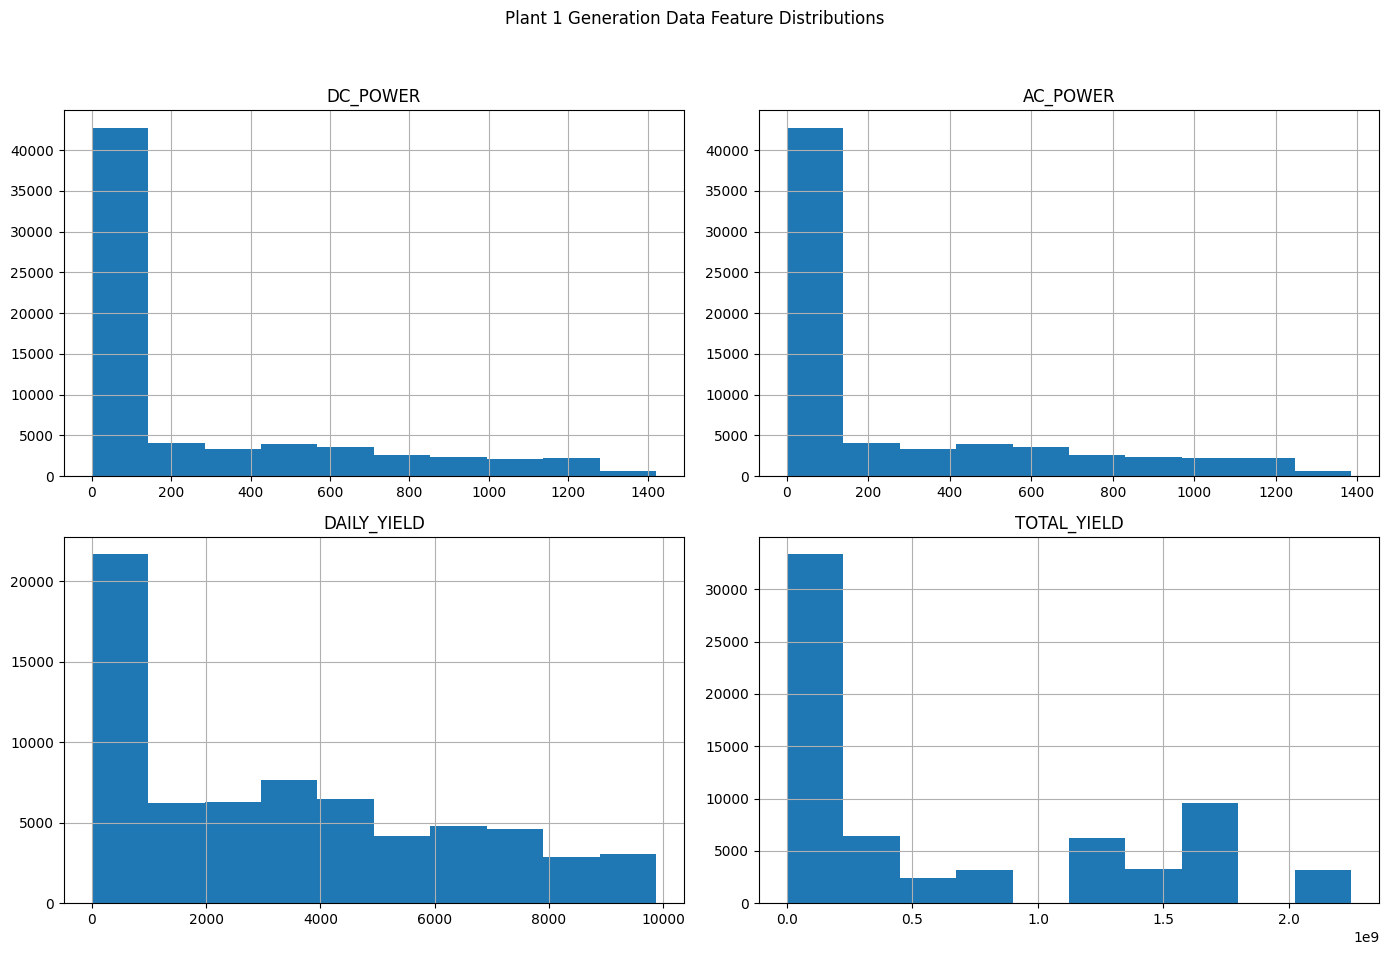

In [9]:
# Plant Generation Data
df[['DC_POWER', 'AC_POWER', 'DAILY_YIELD', 'TOTAL_YIELD']].hist(figsize=(14, 10))
plt.suptitle("Plant 1 Generation Data Feature Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

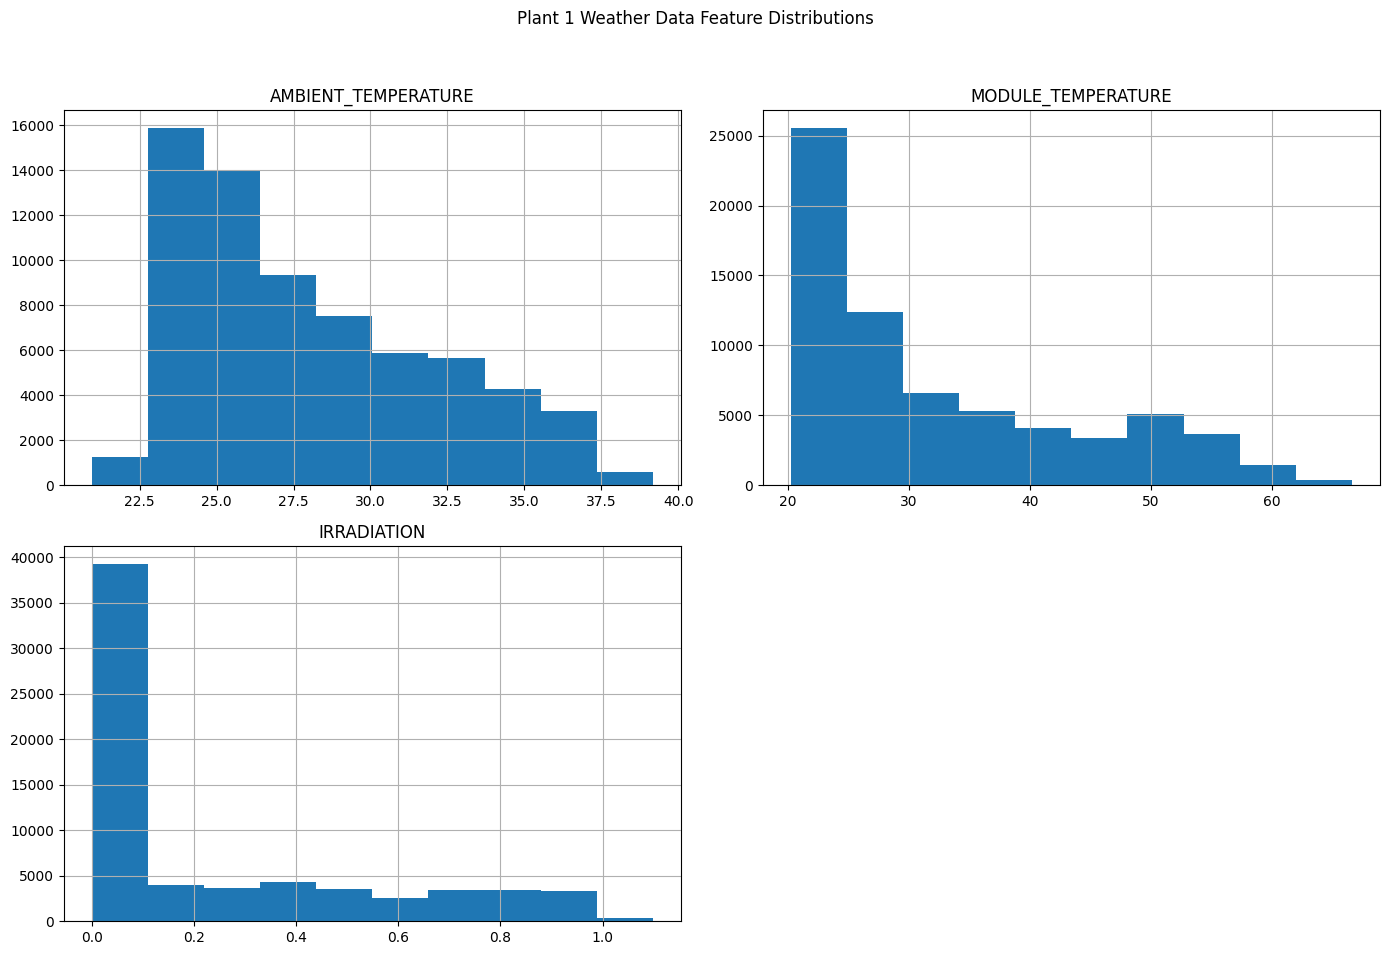

In [10]:
# Plant Weather Data
df[['AMBIENT_TEMPERATURE', 'MODULE_TEMPERATURE', 'IRRADIATION']].hist(figsize=(14, 10))
plt.suptitle("Plant 1 Weather Data Feature Distributions")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

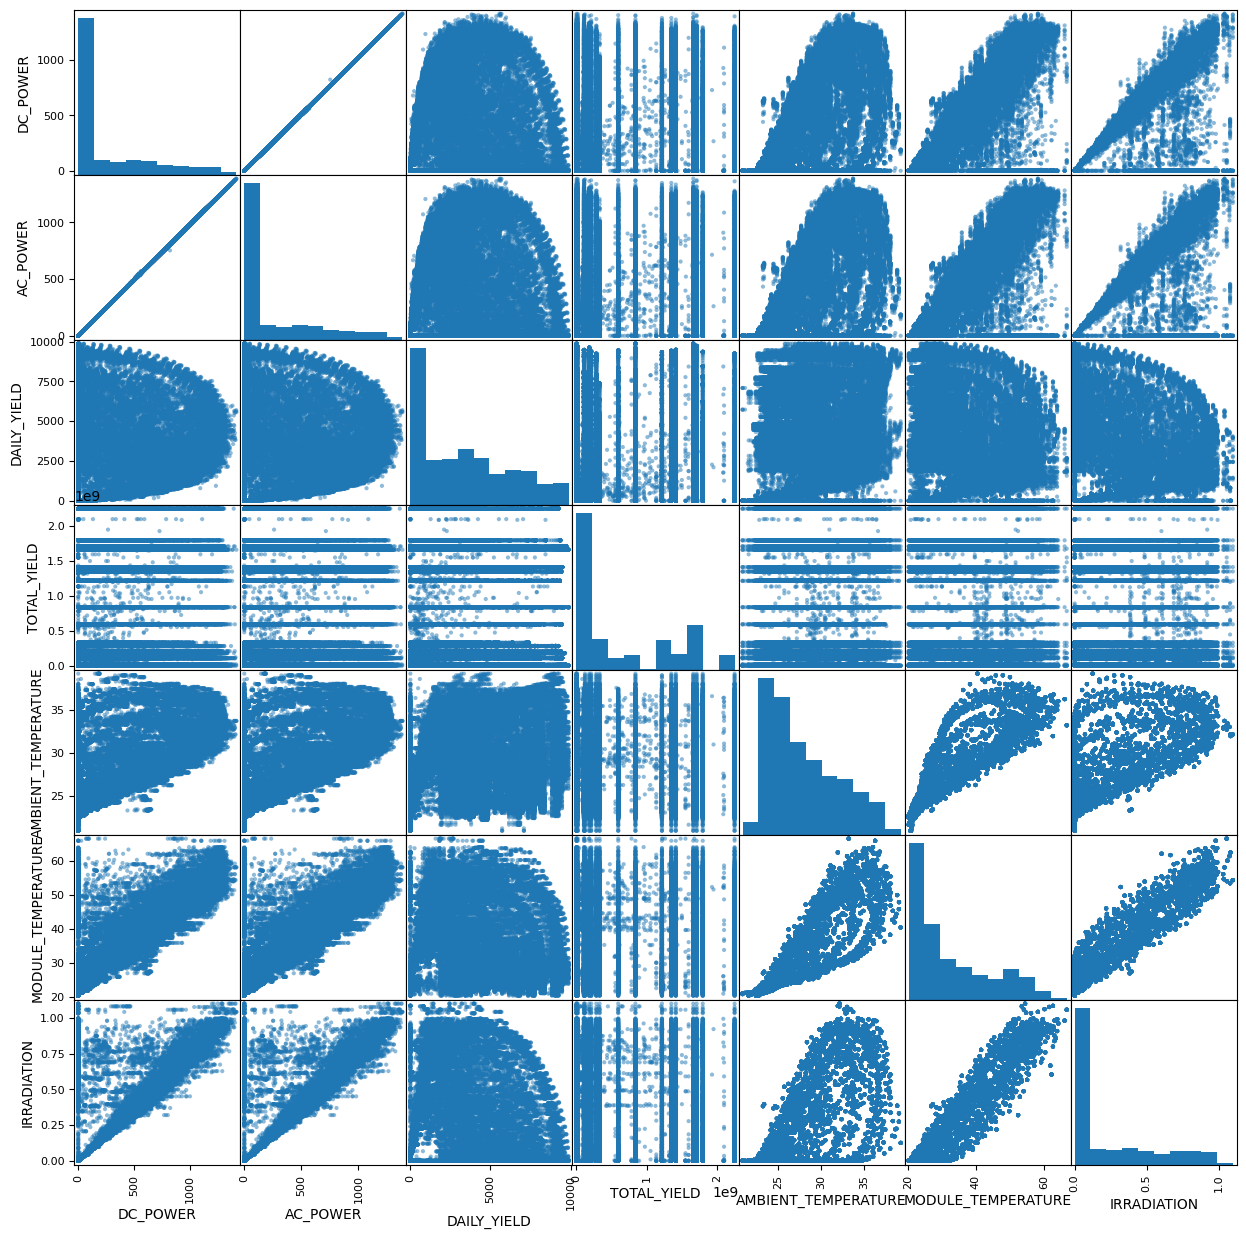

In [11]:
pd.plotting.scatter_matrix(df, figsize=(15,15))

plt.show()

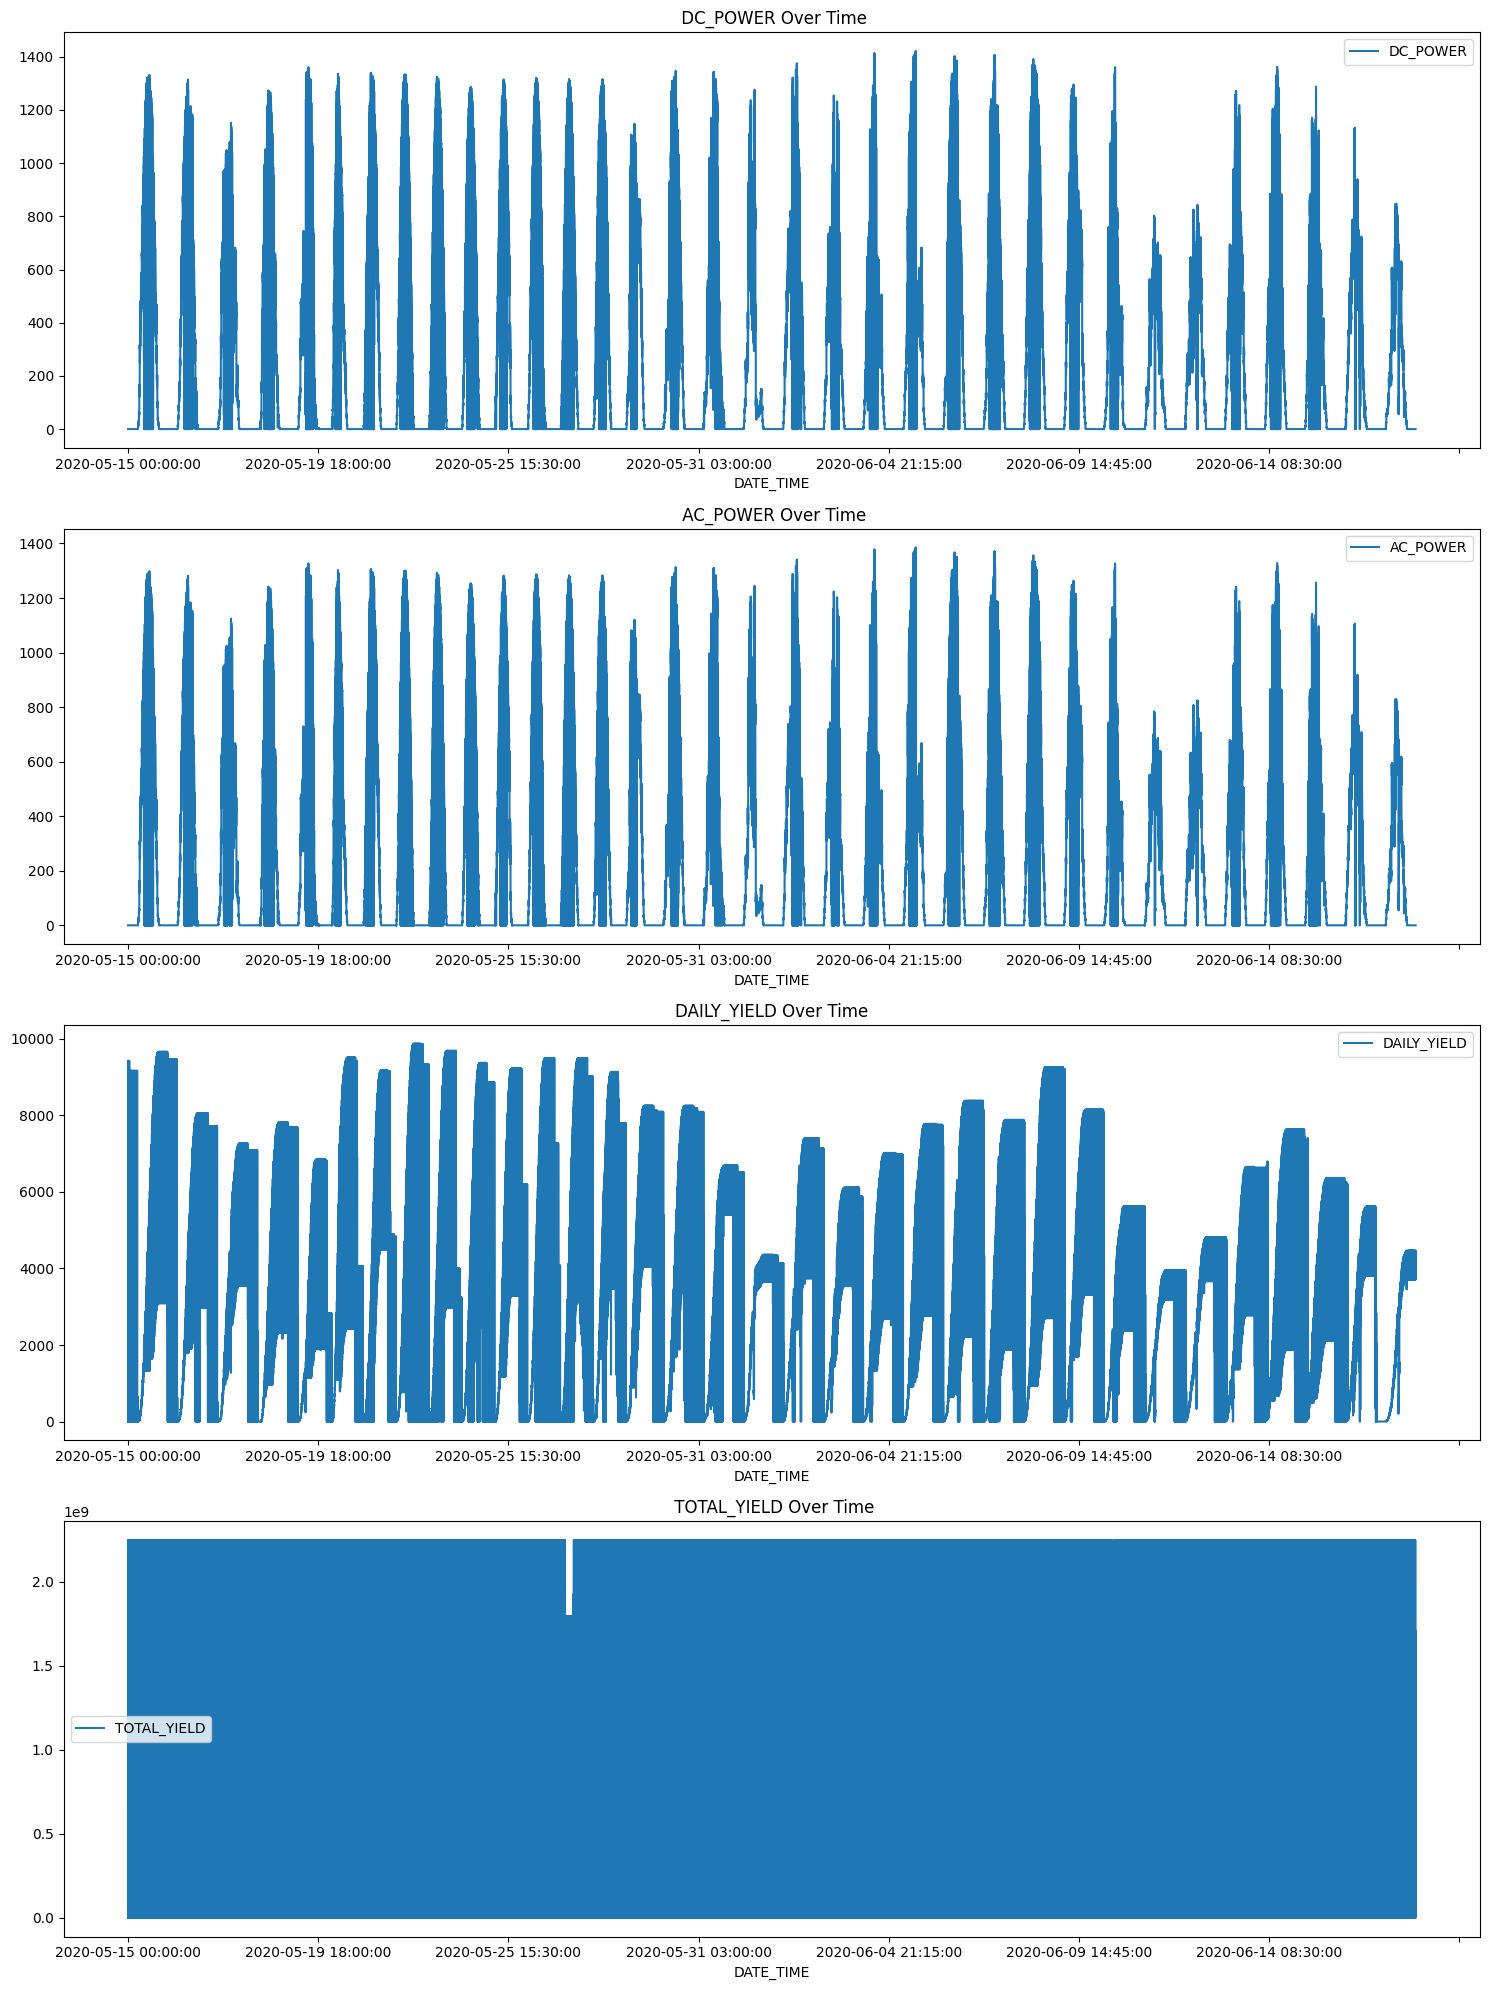

In [12]:
# Visualizing time series trends for key features

# Generation Data Time Series Trends
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(15, 20))
df.plot(x='DATE_TIME', y='DC_POWER', ax=axes[0], title=" DC_POWER Over Time")
df.plot(x='DATE_TIME', y='AC_POWER', ax=axes[1], title=" AC_POWER Over Time")
df.plot(x='DATE_TIME', y='DAILY_YIELD', ax=axes[2], title="DAILY_YIELD Over Time")
df.plot(x='DATE_TIME', y='TOTAL_YIELD', ax=axes[3], title=" TOTAL_YIELD Over Time")
plt.tight_layout()
plt.show()

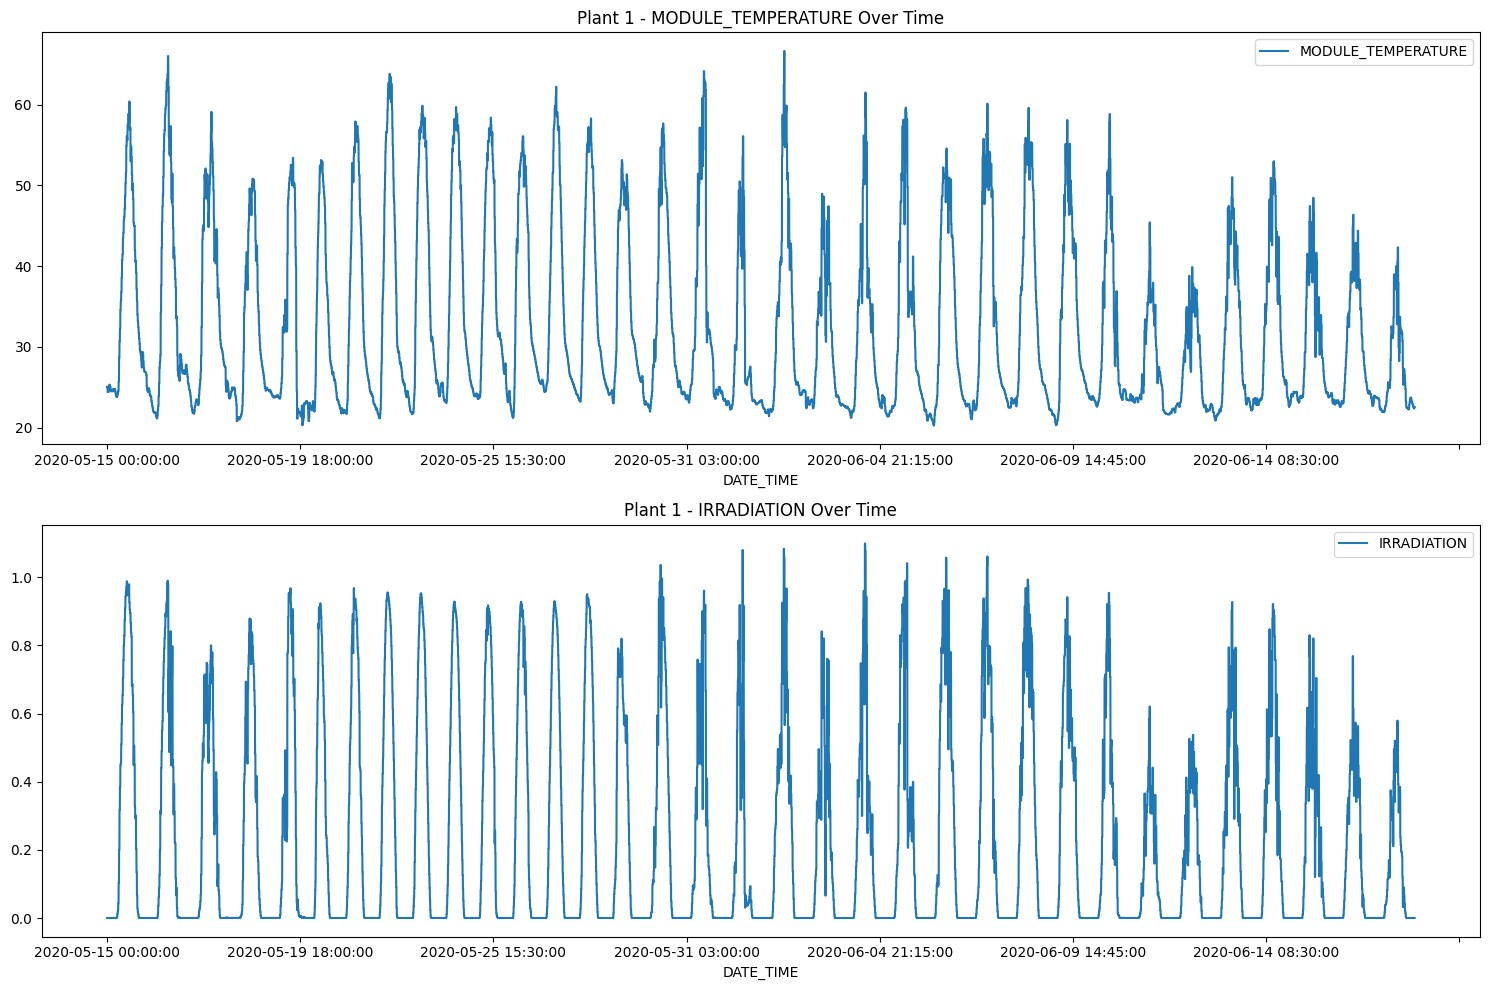

In [13]:


# Plant 1 Weather Data Time Series Trends
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 10))
df.plot(x='DATE_TIME', y='MODULE_TEMPERATURE', ax=axes[0], title="Plant 1 - MODULE_TEMPERATURE Over Time")
df.plot(x='DATE_TIME', y='IRRADIATION', ax=axes[1], title="Plant 1 - IRRADIATION Over Time")
plt.tight_layout()
plt.show()

In [14]:
df_ml = df.copy()
X = df[['DAILY_YIELD', 'TOTAL_YIELD', 'AMBIENT_TEMPERATURE', 'IRRADIATION']]
y = df['AC_POWER']

In [15]:
corr = X.corr()
corr.style.background_gradient(cmap='coolwarm')

,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,IRRADIATION
DAILY_YIELD,1.000000,-0.068472,0.321785,-0.107987
TOTAL_YIELD,-0.068472,1.000000,0.002774,-0.006720
AMBIENT_TEMPERATURE,0.321785,0.002774,1.000000,0.671998
IRRADIATION,-0.107987,-0.006720,0.671998,1.000000


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

score_list = []
n_neighbors_list = []

# For loop to find the best fitting n_neighbor value
for i in range(1, 21):
    knn = neighbors.KNeighborsRegressor(n_neighbors=i, weights='distance', metric='manhattan')
    knn.fit(X_train_scaled, y_train)

    knn_score = knn.score(X_test_scaled, y_test)

    score_list.append(knn_score)
    n_neighbors_list.append(i)

best_n_neighbor = n_neighbors_list[score_list.index(max(score_list))]
print(f"Best n_neighbor at {best_n_neighbor} with {max(score_list)*100:.4f}%")

# Cross-Validation
scores = cross_val_score(knn, X_train_scaled, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

# Ensemble Method - Bagging
bagging = BaggingRegressor(knn, max_samples=0.5, max_features=0.5)
bagging.fit(X_train_scaled, y_train)
bagging_score = bagging.score(X_test_scaled, y_test)
print(f"Bagging score: {bagging_score*100:.4f}%")


Best n_neighbor at 8 with 88.8023%
Mean cross-validation score: 0.88
Bagging score: 86.2565%


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Improved Decision Tree score is 89.4577%


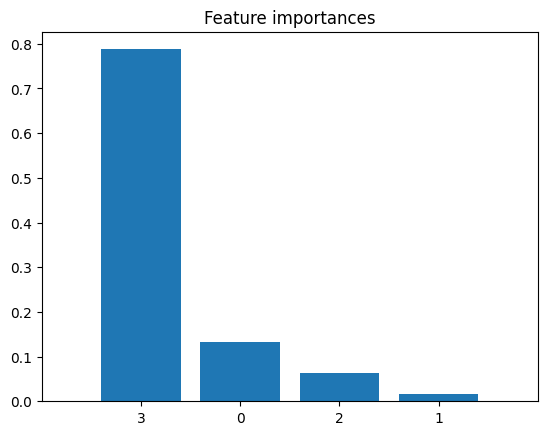

Mean cross-validation score: 89.13%
Random Forest score: 93.8947%


In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Assuming X, y are predefined
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
parameters = {'max_depth': range(3,20), 
              'min_samples_split': range(2,20),
              'min_samples_leaf': range(1,20)}

dtr = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dtr, parameters, cv=5, n_jobs=-1)  # Using all processors with n_jobs=-1
grid_search.fit(X_train, y_train)

# Refit Model with Best Parameters
best_params = grid_search.best_params_
dtr = DecisionTreeRegressor(**best_params, random_state=42)
dtr.fit(X_train, y_train)

# Print the improved score
dtr_score = dtr.score(X_test, y_test)
print(f"Improved Decision Tree score is {dtr_score*100:.4f}%")

# Feature Importance
importances = dtr.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Cross-Validation
scores = cross_val_score(dtr, X_train, y_train, cv=5)
print(f"Mean cross-validation score: {scores.mean()*100:.2f}%")

# Ensemble Method - Random Forest
rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)
rfr_score = rfr.score(X_test, y_test)
print(f"Random Forest score: {rfr_score*100:.4f}%")


In [18]:
# Importing necessary libraries
from sklearn.ensemble import GradientBoostingRegressor

# Creating the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()

# Training the model
gb_regressor.fit(X_train, y_train)

# Evaluating the model
gb_score = gb_regressor.score(X_test, y_test)

# Printing the score
print(f"Score is {gb_score*100:.4f} %")

Score is 86.1103 %


Improved Gradient Boosting score is 92.4943%


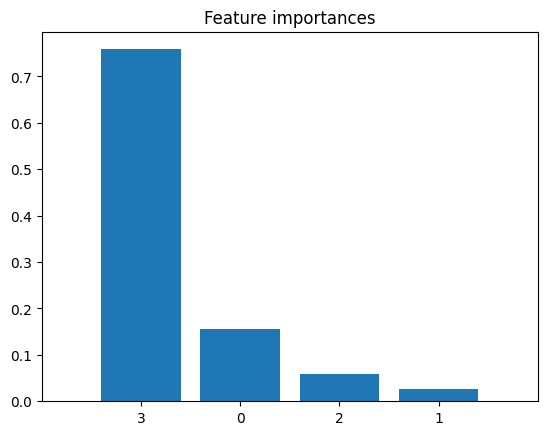

Mean cross-validation score: 91.88%


In [19]:

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingRegressor

# X, y are predefined
# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Hyperparameter Tuning using GridSearchCV
parameters = {'n_estimators': [100, 200, 300],
              'learning_rate': [0.01, 0.05, 0.1],
              'max_depth': range(3,6),
              'subsample': [0.8, 0.9, 1.0]}

gb_regressor = GradientBoostingRegressor(random_state=42)
grid_search = GridSearchCV(gb_regressor, parameters, cv=5, n_jobs=-1)  # Using all processors with n_jobs=-1
grid_search.fit(X_train, y_train)

# Refit Model with Best Parameters
best_params = grid_search.best_params_
gb_regressor = GradientBoostingRegressor(**best_params, random_state=42)
gb_regressor.fit(X_train, y_train)

# Print the improved score
gb_score = gb_regressor.score(X_test, y_test)
print(f"Improved Gradient Boosting score is {gb_score*100:.4f}%")

# Feature Importance
importances = gb_regressor.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Cross-Validation
scores = cross_val_score(gb_regressor, X_train, y_train, cv=5)
print(f"Mean cross-validation score: {scores.mean()*100:.2f}%")
